In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
# Load the DataFrame from the CSV file

df_mysql = pd.read_csv('df_mysql.csv')


In [3]:
#exploring the shape of the dataframe
df_mysql.shape

(103594, 25)

In [4]:
print(df_mysql.head(6))

   MyUnknownColumn      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
5                5  111157  Female     Loyal Customer   26  Personal Travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   
5       Eco             1180                      3   

   Departure/Arrival time convenient  ...  Inflight entertai

# Exploring the missing values and unimportant columns

In [5]:
#Exploring the dataset attributes
df_mysql.columns

Index(['MyUnknownColumn', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
#Exploring the data in a certain column
df_mysql['id']

0          70172
1           5047
2         110028
3          24026
4         119299
           ...  
103589     94171
103590     73097
103591     68825
103592     54173
103593     62567
Name: id, Length: 103594, dtype: int64

In [7]:
#check the duplication in the records based on id_column
duplicates = df_mysql.duplicated(subset='id', keep=False)
 #Print the rows with duplicate values in the specified column
print(df_mysql[duplicates])


Empty DataFrame
Columns: [MyUnknownColumn, id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, satisfaction]
Index: []

[0 rows x 25 columns]


In [8]:
# Detecting missing values in coloumns
df_mysql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   MyUnknownColumn                    103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [9]:
missing_data=df_mysql.isnull().sum().sort_values(ascending=False)
print(missing_data)

MyUnknownColumn                      0
Online boarding                      0
Arrival Delay in Minutes             0
Departure Delay in Minutes           0
Cleanliness                          0
Inflight service                     0
Checkin service                      0
Baggage handling                     0
Leg room service                     0
On-board service                     0
Inflight entertainment               0
Seat comfort                         0
Food and drink                       0
id                                   0
Gate location                        0
Ease of Online booking               0
Departure/Arrival time convenient    0
Inflight wifi service                0
Flight Distance                      0
Class                                0
Type of Travel                       0
Age                                  0
Customer Type                        0
Gender                               0
satisfaction                         0
dtype: int64


In [10]:
# Removing unimportant coloumns from the mysql dataset
df_mysql_new=df_mysql.drop(['MyUnknownColumn','id'], axis=1)
df_mysql_new.shape

(103594, 23)

#  Understanding the distribution and characteristics of the data. 

In [11]:
# Summary statistics of numeric features
stat_desc=df_mysql_new.describe()
stat_desc
# indicates no ouliers in the categorical features

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:

# Summary statistics of string features
df_mysql_new.describe(include=object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103594,103594,103594,103594,103594
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52576,84662,71465,49533,58697


In [13]:
df_mysql_new['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

# Finding the outliers in the dataset
1) check the distribution of numerical features by histograms
2) Boxplot to find outliers based on 1.5 IQR

In [14]:
# Data types of columns
df_mysql_new.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

(array([ 7002., 17228., 15353., 10366.,  9942.,  7113.,  3126.,  4679.,
         4251.,  3176.,  2727.,  2806.,  3747.,  2126.,  1696.,  1590.,
         1624.,  1623.,  1675.,  1686.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000., 2200., 2400., 2600., 2800., 3000., 3200., 3400.,
        3600., 3800., 4000.]),
 <BarContainer object of 20 artists>)

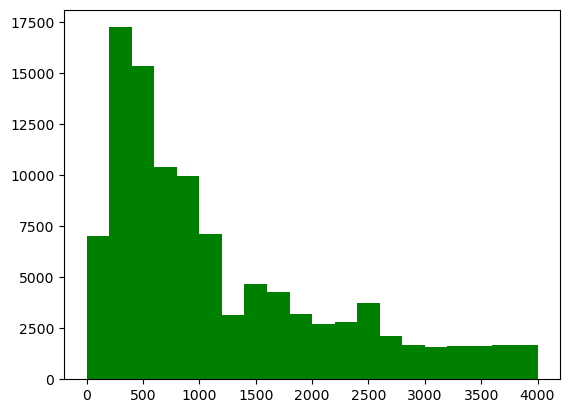

In [15]:
## Exploring the distribution of the numerical columns using HISTOGRAMS
# Exploring the distribution of flight distance using Histogram 

plt.hist(df_mysql_new["Flight Distance"],20, range=[0, 4000], facecolor='green', align='mid')

(array([3188., 1923., 1444., 1049.,  834.,  614.,  518.,  410.,  313.,
         291.,  224.,  199.,  180.,  138.,   93.,   76.,   70.,   57.,
          50.,   43.,   32.,   36.,   32.,   27.,   27.,   20.,   17.,
          12.,    9.,   16.]),
 array([ 38.        ,  50.06666667,  62.13333333,  74.2       ,
         86.26666667,  98.33333333, 110.4       , 122.46666667,
        134.53333333, 146.6       , 158.66666667, 170.73333333,
        182.8       , 194.86666667, 206.93333333, 219.        ,
        231.06666667, 243.13333333, 255.2       , 267.26666667,
        279.33333333, 291.4       , 303.46666667, 315.53333333,
        327.6       , 339.66666667, 351.73333333, 363.8       ,
        375.86666667, 387.93333333, 400.        ]),
 <BarContainer object of 30 artists>)

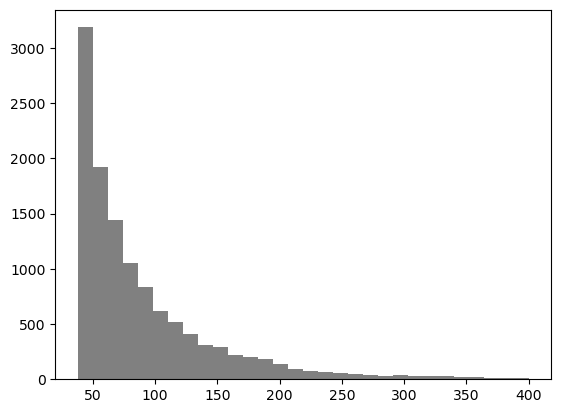

In [16]:
# Histogram of departure delay column 
plt.hist(df_mysql_new["Departure Delay in Minutes"],30, range=[38, 400], facecolor='gray', align='mid')

(array([69567.,  8577.,  4923.,  4057.,  2882.,  1964.,  1788.,  1388.,
          960.,   986.,   797.,   563.,   582.,   524.,   368.,   394.,
          338.,   270.,   271.,   227.,   203.,   171.,   168.,   137.,
          156.,   119.,   115.,   125.,    88.,    79.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <BarContainer object of 30 artists>)

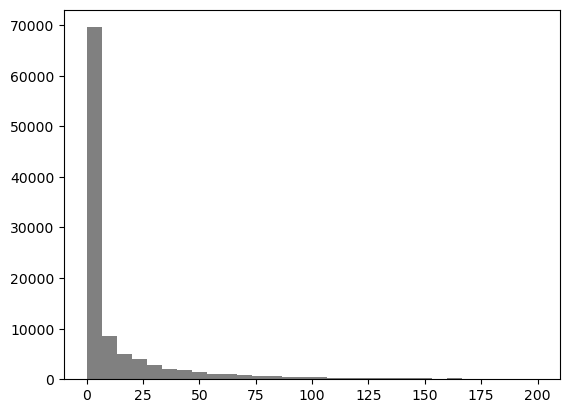

In [17]:
# Histogram of arrival delay column 
plt.hist(df_mysql_new["Arrival Delay in Minutes"],30, range=[0, 200], facecolor='gray', align='mid')

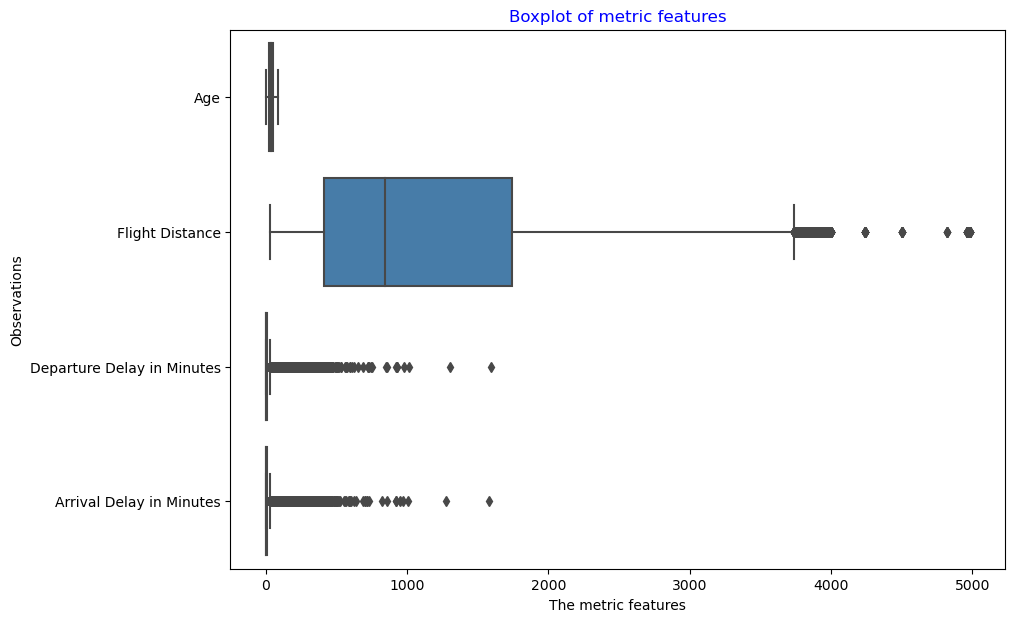

In [18]:
# Creating boxplot of numerical colomns 

df_box_plt=df_mysql_new[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
plt.figure(figsize=(10, 7))
ax=sns.boxplot(data=df_box_plt, orient="h", palette="Set1")  # You can customize the palette as needed
ax.set(xlabel='The metric features', ylabel='Observations')
title_color = 'blue'
plt.title('Boxplot of metric features', color= title_color)
plt.show()

In [19]:
# Creating a function to detect the outliers in the numerical columns
def detect_outliers(data_column):
     q1 = np.quantile(data_column, 0.25)
     q3 = np.quantile(data_column, 0.75)
     med = np.median(data_column)
     iqr = q3-q1
     upper_bound = q3+(1.5*iqr)
     lower_bound = q1-(1.5*iqr)
     outliers = (data_column < lower_bound) | (data_column > upper_bound)


     results = {
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Lower_Whiskers': lower_bound,
        'Upper_Whiskers': upper_bound,
        'Outliers': outliers
    }

     return results


In [20]:
# Detecting the outliers in the flight distance column
flight_distance_column = df_box_plt['Flight Distance']
outlier_detection_results = detect_outliers(flight_distance_column)
print(outlier_detection_results)



{'Q1': 414.0, 'Q3': 1743.0, 'IQR': 1329.0, 'Lower_Whiskers': -1579.5, 'Upper_Whiskers': 3736.5, 'Outliers': 0         False
1         False
2         False
3         False
4         False
          ...  
103589    False
103590    False
103591    False
103592    False
103593    False
Name: Flight Distance, Length: 103594, dtype: bool}


In [21]:
 # Detecting outliers of departure delay colomn
deparure_delay_column = df_box_plt['Departure Delay in Minutes']
outlier_detection_results_departure = detect_outliers(deparure_delay_column)
print(outlier_detection_results_departure)

{'Q1': 0.0, 'Q3': 12.0, 'IQR': 12.0, 'Lower_Whiskers': -18.0, 'Upper_Whiskers': 30.0, 'Outliers': 0         False
1         False
2         False
3         False
4         False
          ...  
103589    False
103590    False
103591    False
103592    False
103593    False
Name: Departure Delay in Minutes, Length: 103594, dtype: bool}


In [22]:
# Detecting outliers of arrival delay colomn
arrival_delay_column = df_box_plt['Arrival Delay in Minutes']
outlier_detection_results_arrival = detect_outliers(arrival_delay_column)
print(outlier_detection_results_arrival)

{'Q1': 0.0, 'Q3': 13.0, 'IQR': 13.0, 'Lower_Whiskers': -19.5, 'Upper_Whiskers': 32.5, 'Outliers': 0         False
1         False
2         False
3         False
4         False
          ...  
103589    False
103590    False
103591    False
103592    False
103593    False
Name: Arrival Delay in Minutes, Length: 103594, dtype: bool}


# Exploring the relationship between the target variable and string features
### Contingency Table showing correlation between the categorical variables in the df_mysql_new and the target variables
### Chi2 test (hypothesis testing)

In [23]:
# Extract string features into a separated dataset
df_mysql_catg=df_mysql_new[['Gender','Customer Type', 'Type of Travel'	,'Class','satisfaction']].copy()

<Axes: xlabel='satisfaction', ylabel='count'>

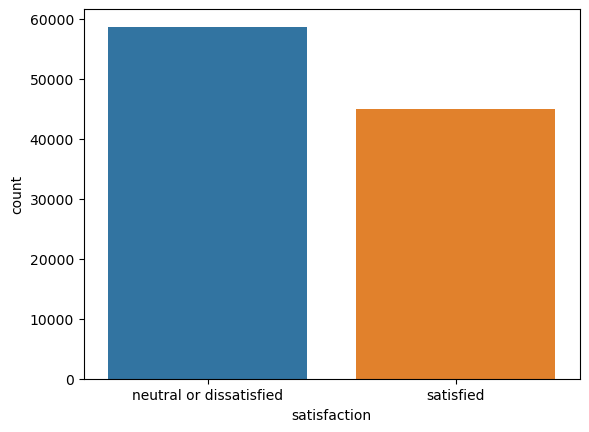

In [24]:
#The distribution of the dependent variable (satisfaction) plotting countplot
#To check whether y is balanaced or not  

sns.countplot(x=df_mysql_new['satisfaction'])
#Balanced Distribution

In [25]:
# Contingency Table showing correlation between the gender and satisfaction

crosstab_gender=pd.crosstab(index=df_mysql_catg['satisfaction'], columns=df_mysql_catg['Gender'])
print(crosstab_gender)


# performig the significance testing using chi2_contingency()
# H0: there is NO relation between gender & satisfaction
stat, p, dof, expected = chi2_contingency(crosstab_gender)
# interpret p-value
alpha = 0.05
print("p value is " + str(p) )
if p <= alpha:
    print('significant relationship (reject H0)')
else:
    print('Independent (H0 holds true)')
  


Gender                   Female   Male
satisfaction                          
neutral or dissatisfied   30107  28590
satisfied                 22469  22428
p value is 7.168224693815838e-05
significant relationship (reject H0)


<Axes: ylabel='satisfaction'>

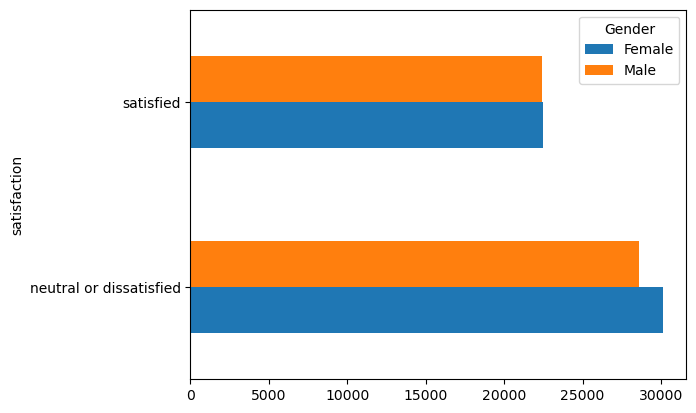

In [26]:
 #Understanding the distribution of the satisfaction among gender

crosstab_gender.plot(kind="barh",stacked=None)

In [27]:
# Contingency Table showing correlation between  customer type and satisfaction
crosstab_cust_typ=pd.crosstab(index=df_mysql_catg['satisfaction'], columns=df_mysql_catg['Customer Type'])
print(crosstab_cust_typ)


 #performig the significance testing using chi2_contingency()
# H0: there is NO a relation between customer type & satisfaction
stat_cust, p_cust, dof_cust, expected_cust = chi2_contingency(crosstab_cust_typ)
# interpret p-value
alpha = 0.05
print("p value is " + str(p_cust), 'chi=',stat_cust)
if p_cust <= alpha:
    print('significant relationship (reject H0)')
else:
    print('Independent (H0 holds true)')
  

Customer Type            Loyal Customer  disloyal Customer
satisfaction                                              
neutral or dissatisfied           44249              14448
satisfied                         40413               4484
p value is 0.0 chi= 3643.2666554467874
significant relationship (reject H0)


<Axes: ylabel='satisfaction'>

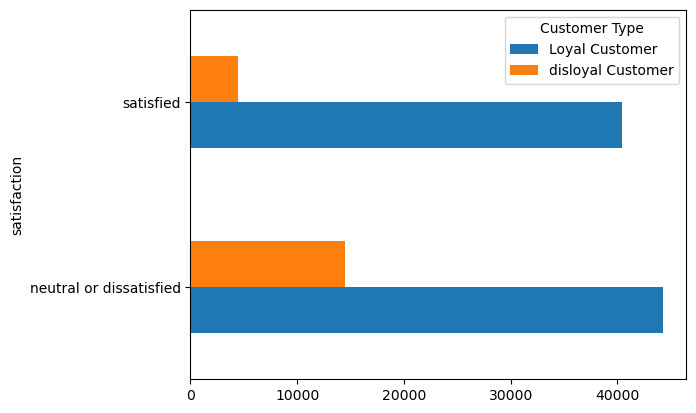

In [28]:
#Understanding the distribution of the satisfaction among customer's type

crosstab_cust_typ.plot(kind="barh",stacked=None)


In [29]:
# Contingency Table showing correlation between  class and satisfaction
crosstab_class=pd.crosstab(index=df_mysql_catg['satisfaction'], columns=df_mysql_catg['Class'])
print(crosstab_class)

#performig the significance testing using chi2_contingency()
#Chi-square test of independence of variables in a contingency table
# H0: there is NO  relation between class & satisfaction
stat_class, p_class, dof_class, expected_class = chi2_contingency(crosstab_class) #stat_class:test statistic,  p_class:p-value of the test
# interpret p-value
alpha = 0.05
print("p value is " + str(p_class))
if p_class <= alpha:
    print('significant relationship (reject H0)')
else:
    print('Independent (H0 holds true)')

Class                    Business    Eco  Eco Plus
satisfaction                                      
neutral or dissatisfied     15143  37922      5632
satisfied                   34390   8671      1836
p value is 0.0
significant relationship (reject H0)


<Axes: ylabel='satisfaction'>

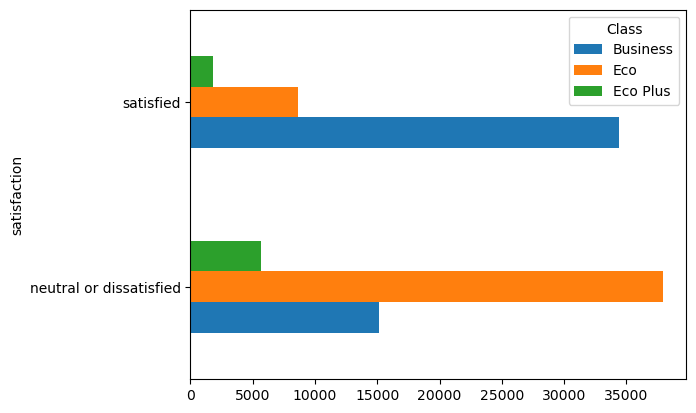

In [30]:
#Understanding the distribution of the satisfaction among classes
crosstab_class.plot(kind="barh",stacked=None)


#Exploring the correlation of the 'numerical' features with the satisfaction conducting a correlation matrix


In [31]:
#create dummies for satisfaction feature ( to call it into the corr_matrix)
df_sat_dumm = pd.get_dummies(df_mysql_new, columns=['satisfaction'],drop_first=False)

In [32]:
df_sat_dumm.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,1,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,1,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,0,1


In [33]:
#Corrolation matrix for the categorical 'numeric' feature
corr_matrix=df_sat_dumm.corr()

C:\Users\sondo\AppData\Local\Temp\ipykernel_125196\3626605450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df_sat_dumm.corr()


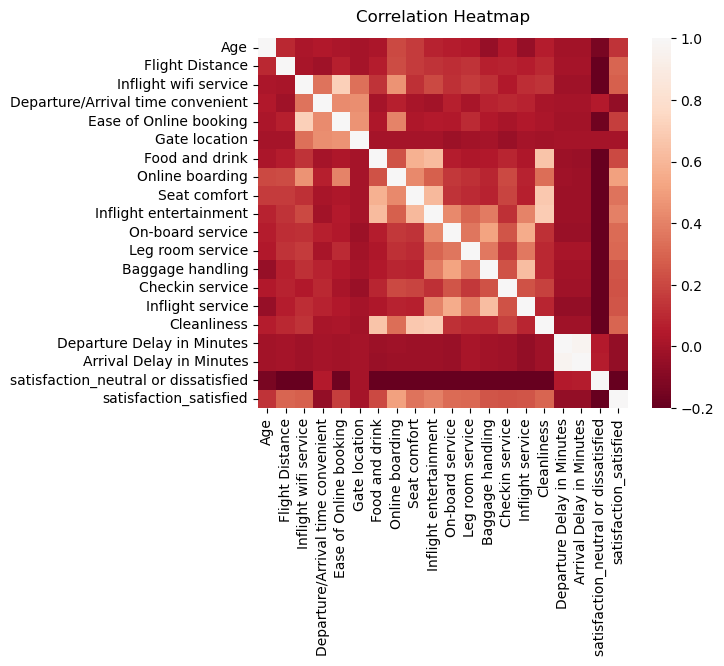

In [34]:
#Heatmap of numerical features vs. satisfaction
#center=colorless
hm=sns.heatmap(corr_matrix, vmin=-0.2, vmax=1, cmap='RdBu', annot=None, center=True, annot_kws=None, linewidths=0, linecolor = 'pink', square=True, cbar=True)

hm.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [35]:
#Correlation of the dependent Variable (satisfaction) with the other numerical features in the cleaned dataset
#returns the correlation of all features with ‘satisfaction’, a single, dependent variable
#df_sat_dumm.info()
df_sat_dumm.corr()[['satisfaction_satisfied']].sort_values(by='satisfaction_satisfied', ascending=False)

C:\Users\sondo\AppData\Local\Temp\ipykernel_125196\2937387941.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sat_dumm.corr()[['satisfaction_satisfied']].sort_values(by='satisfaction_satisfied', ascending=False)


,satisfaction_satisfied
satisfaction_satisfied,1.000000
Online boarding,0.503447
Inflight entertainment,0.398203
Seat comfort,0.349112
On-board service,0.322450
Leg room service,0.313182
Cleanliness,0.305050
Flight Distance,0.298915
Inflight wifi service,0.284163
Baggage handling,0.247819


# Forcasting the customer's satisfaction using the most relevant features in the data set applying the skit-learn algorithm

* The numerical categorical features:
 % Online boarding	
 % Inflight entertainment	

In [39]:
 # Training the linear SVC model
 # predicting the satisfaction by using the numerical features for training the model (Online boarding, Inflight entertainment)

from sklearn import svm
 
x=df_mysql_new[['Online boarding','Inflight entertainment']]
y=df_sat_dumm['satisfaction_satisfied']

def mylincsv(feature,label):
 
  x=feature
  y=label
  #define classifier
  clf = svm.SVC(kernel='linear', C = 1.0)
  clf.fit(x,y)
  result_1 = clf.score(x, y)
  print(" Train Accuracy:" , (result_1*100.0))


In [40]:
#Calling the function by the user   
mylincsv(df_mysql_new[['Online boarding','Inflight entertainment']],df_sat_dumm['satisfaction_satisfied'])  

 Train Accuracy: 79.89265787593877


In [42]:
#Predicting the satisfaction based on the string features (age, class, type of travel, type of customer)
#Defining a function to convert string features into dummies
# #Applying Linear SVC classifier


def mydummies(my_data,x_feature):
  
  feat_dumm = pd.get_dummies(my_data[x_feature],drop_first=True)
 
  return(feat_dumm)
 
#call the function
cat_feat=mydummies(df_mysql_catg,['Class','Gender','Customer Type','Type of Travel'])
print(cat_feat)

        Class_Eco  Class_Eco Plus  Gender_Male  \
0               0               1            1   
1               0               0            1   
2               0               0            0   
3               0               0            0   
4               0               0            1   
...           ...             ...          ...   
103589          1               0            0   
103590          0               0            1   
103591          0               0            1   
103592          1               0            0   
103593          0               0            1   

        Customer Type_disloyal Customer  Type of Travel_Personal Travel  
0                                     0                               1  
1                                     1                               0  
2                                     0                               0  
3                                     0                               0  
4                            

In [43]:
#Applying Linear SVC classifier
#Predicting the satisfaction based on the string features (age, class, type of travel, type of customer)


mylincsv(cat_feat,df_sat_dumm['satisfaction_satisfied']) 

 Train Accuracy: 77.56337239608472


In [44]:
 #Extracting the x-faeatures in a separated dataframe
# Numerical features: onlineboarding, inflight entertainment
#String features: age, class, type of travel, type of customer


x_feat_train=pd.concat([cat_feat,df_mysql_new[['Online boarding','Inflight entertainment']]],axis=1)




In [45]:
#Applying linear SVC to prdict the satisfaction based on 7 input features 
# most relevant features

mylincsv(x_feat_train,df_sat_dumm['satisfaction_satisfied']) 

 Train Accuracy: 85.06187617043459
